<a href="https://colab.research.google.com/github/Wilson-roy/Lab-0_Operations_Research_Assignments/blob/main/Project_Assignments/LPAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

In [13]:
!pip install pulp


SET 03 – LINEAR PROGRAMMING: FINDING THE FEASIBLE REGION AND MAXIMUM P

1️⃣ PROBLEM STATEMENT:
We are given the following system of inequalities:
   x + y ≤ 8
   5x + y ≥ 15
   x ≥ 0, y ≥ 0
We need to determine the shape of the feasible region, find its vertices,
and identify the corner that maximizes the objective function P = 3x + 2y.

2️⃣ FINDING CORNER POINTS:
Feasible vertices found: [(np.float64(1.75), np.float64(6.25)), (3.0, 0.0), (8.0, 0.0)]

3️⃣ ORDERED VERTICES (Clockwise from smallest x):
Vertex 1: (7/4, 25/4)  ≈ (1.75, 6.25)
Vertex 2: (8, 0)  ≈ (8.00, 0.00)
Vertex 3: (3, 0)  ≈ (3.00, 0.00)

4️⃣ GRAPHING THE FEASIBLE REGION...


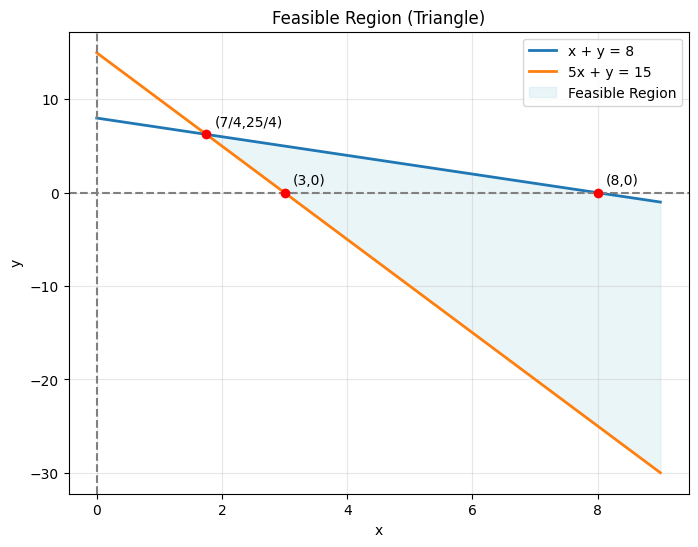


5️⃣ SLACK AND SURPLUS VALUES AT EACH VERTEX:
At (1.75, 6.25) → Slack (s1) = 0.00, Surplus (s2) = 0.00
At (8.00, 0.00) → Slack (s1) = 0.00, Surplus (s2) = 25.00
At (3.00, 0.00) → Slack (s1) = 5.00, Surplus (s2) = 0.00

6️⃣ EVALUATING OBJECTIVE FUNCTION  P = 3x + 2y:
At (1.75, 6.25) → P = 3(1.75) + 2(6.25) = 17.75
At (8.00, 0.00) → P = 3(8.00) + 2(0.00) = 24.00
At (3.00, 0.00) → P = 3(3.00) + 2(0.00) = 9.00

✅ The maximum value of P = 24.00 occurs at vertex (8.00, 0.00).

7️⃣ VERIFICATION USING PULP SOLVER:
Solver status: Optimal
Optimal x = 8.00, y = 0.00, P = 24.00

🎯 FINAL RESULTS – SET 03 PROBLEM 3 SUMMARY
Feasible region shape: Triangle
Vertex 1: (7/4, 25/4)
Vertex 2: (8, 0)
Vertex 3: (3, 0)

Maximum P = 24.00 at vertex (8.00, 0.00)


In [14]:
# ============================================
# SET 03 – LINEAR PROGRAMMING: PROBLEM 3
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
import pulp

print("=" * 65)
print("SET 03 – LINEAR PROGRAMMING: FINDING THE FEASIBLE REGION AND MAXIMUM P")
print("=" * 65)

# ----------------------------------------------------
# 1. Problem Description
# ----------------------------------------------------
print("\n1️⃣ PROBLEM STATEMENT:")
print("We are given the following system of inequalities:")
print("   x + y ≤ 8")
print("   5x + y ≥ 15")
print("   x ≥ 0, y ≥ 0")
print("We need to determine the shape of the feasible region, find its vertices,")
print("and identify the corner that maximizes the objective function P = 3x + 2y.")
print()

# ----------------------------------------------------
# 2. Finding the Corner (Intersection) Points
# ----------------------------------------------------
print("2️⃣ FINDING CORNER POINTS:")

# Define the two main constraint equations as lines
A = np.array([[1.0, 1.0],
              [5.0, 1.0]])
b = np.array([8.0, 15.0])

# Intersection of x + y = 8 and 5x + y = 15
x_int, y_int = np.linalg.solve(A, b)
candidates = [(x_int, y_int)]  # (7/4, 25/4)

# Axis intercepts (potential corner points)
candidates += [
    (8.0, 0.0),   # x+y=8 with y=0
    (3.0, 0.0),   # 5x+y=15 with y=0
    (0.0, 8.0),   # x+y=8 with x=0
    (0.0, 15.0)   # 5x+y=15 with x=0
]

# Filter only the feasible points that satisfy all constraints
feasible = []
for x, y in candidates:
    if x >= 0 and y >= 0 and x + y <= 8 + 1e-9 and 5*x + y >= 15 - 1e-9:
        feasible.append((x, y))

# Clean and sort them
feasible = sorted({(round(x, 8), round(y, 8)) for x, y in feasible}, key=lambda p: (p[0], p[1]))
print("Feasible vertices found:", feasible)

# ----------------------------------------------------
# 3. Ordering the Vertices (Clockwise from smallest x)
# ----------------------------------------------------
V = np.array(feasible)
center = V.mean(axis=0)
angles = np.arctan2(V[:,1] - center[1], V[:,0] - center[0])
order = np.argsort(-angles)
Vcw = V[order].tolist()

# Convert to readable fraction form
def to_frac(v): return (Fraction(v[0]).limit_denominator(), Fraction(v[1]).limit_denominator())
Vcw_frac = [to_frac(v) for v in Vcw]

print("\n3️⃣ ORDERED VERTICES (Clockwise from smallest x):")
for i, (v, vf) in enumerate(zip(Vcw, Vcw_frac), start=1):
    print(f"Vertex {i}: ({vf[0]}, {vf[1]})  ≈ ({v[0]:.2f}, {v[1]:.2f})")

# ----------------------------------------------------
# 4. Plot the Feasible Region
# ----------------------------------------------------
print("\n4️⃣ GRAPHING THE FEASIBLE REGION...")

x_vals = np.linspace(0, 9, 300)
y_upper = 8 - x_vals
y_lower = 15 - 5*x_vals

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_upper, lw=2, label="x + y = 8")
plt.plot(x_vals, y_lower, lw=2, label="5x + y = 15")
plt.axvline(0, ls="--", color="gray")
plt.axhline(0, ls="--", color="gray")

# Shade feasible area
plt.fill_between(x_vals, y_lower, y_upper, where=(y_upper >= y_lower), alpha=0.25, color="lightblue", label="Feasible Region")

# Mark the corner points
for (x, y), (fx, fy) in zip(Vcw, Vcw_frac):
    plt.plot(x, y, "ro")
    plt.annotate(f"({fx},{fy})", (x, y), xytext=(6, 6), textcoords="offset points")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Feasible Region (Triangle)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ----------------------------------------------------
# 5. Slack and Surplus Variable Check
# ----------------------------------------------------
print("\n5️⃣ SLACK AND SURPLUS VALUES AT EACH VERTEX:")
for (x, y) in Vcw:
    s1 = 8 - (x + y)           # slack for x + y ≤ 8
    s2 = (5*x + y) - 15        # surplus for 5x + y ≥ 15
    print(f"At ({x:.2f}, {y:.2f}) → Slack (s1) = {s1:.2f}, Surplus (s2) = {s2:.2f}")

# ----------------------------------------------------
# 6. Evaluating the Objective Function
# ----------------------------------------------------
print("\n6️⃣ EVALUATING OBJECTIVE FUNCTION  P = 3x + 2y:")

best_P = -float("inf")
best_vertex = None

for (x, y) in Vcw:
    P = 3*x + 2*y
    print(f"At ({x:.2f}, {y:.2f}) → P = 3({x:.2f}) + 2({y:.2f}) = {P:.2f}")
    if P > best_P:
        best_P = P
        best_vertex = (x, y)

print(f"\n✅ The maximum value of P = {best_P:.2f} occurs at vertex ({best_vertex[0]:.2f}, {best_vertex[1]:.2f}).")

# ----------------------------------------------------
# 7. Verification with PuLP Solver
# ----------------------------------------------------
print("\n7️⃣ VERIFICATION USING PULP SOLVER:")

prob = pulp.LpProblem("Set03_Problem3", pulp.LpMaximize)
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

# Objective and constraints
prob += 3*x + 2*y
prob += x + y <= 8
prob += 5*x + y >= 15

prob.solve(pulp.PULP_CBC_CMD(msg=False))

print(f"Solver status: {pulp.LpStatus[prob.status]}")
print(f"Optimal x = {x.varValue:.2f}, y = {y.varValue:.2f}, P = {pulp.value(prob.objective):.2f}")

# ----------------------------------------------------
# Final Summary
# ----------------------------------------------------
print("\n" + "="*65)
print("🎯 FINAL RESULTS – SET 03 PROBLEM 3 SUMMARY")
print("="*65)
print("Feasible region shape: Triangle")
for i, vf in enumerate(Vcw_frac, start=1):
    print(f"Vertex {i}: ({vf[0]}, {vf[1]})")
print(f"\nMaximum P = {best_P:.2f} at vertex ({best_vertex[0]:.2f}, {best_vertex[1]:.2f})")
print("="*65)


## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

SET 04 – SNOWBOARD PRODUCTION OPTIMIZATION

1️⃣ PROBLEM STATEMENT:

A company manufactures two types of snowboards:
  → Deluxe model
  → Standard model

Each deluxe board requires 28 hours and 66 units of material.
Each standard board requires 14 hours and 55 units of material.
The company has 1,008 total production hours and 3,036 units of material available.

Each deluxe board sells for $266, and each standard board sells for $190.

Goal: Determine how many of each model should be produced to maximize total revenue.

Mathematically, we can express this as:
  Maximize:  R = 266x + 190y
  Subject to:
     28x + 14y ≤ 1008  (Production hours)
     66x + 55y ≤ 3036  (Material availability)
     x, y ≥ 0  (Non-negativity)

2️⃣ FINDING CORNER POINTS:
Feasible corner points: [(0.0, 0.0), (0.0, 55.2), (36.0, 0.0)]

3️⃣ PLOTTING THE FEASIBLE REGION (shaded area represents all valid combinations):


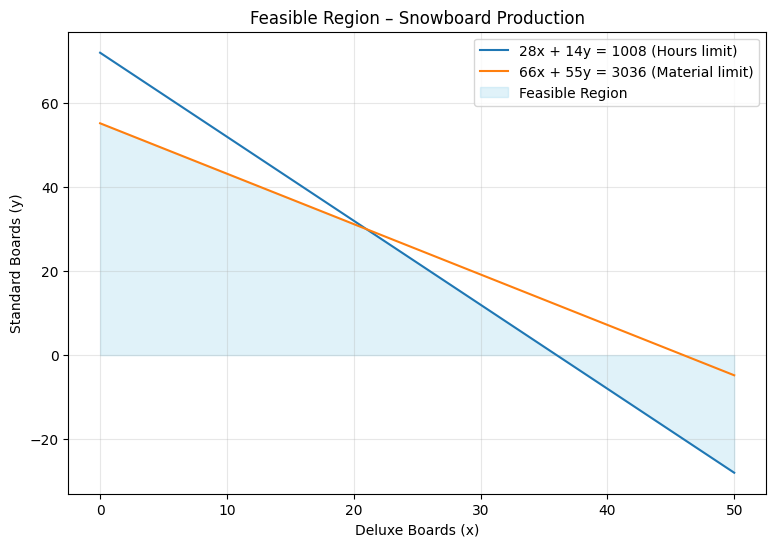


4️⃣ CALCULATING REVENUE AT EACH CORNER:
  Corner (0.00, 0.00) → Revenue = $0.00
  Corner (0.00, 55.20) → Revenue = $10,488.00
  Corner (36.00, 0.00) → Revenue = $9,576.00

✅ The highest revenue is $10,488.00, achieved by producing:
   → Deluxe boards (x) = 0
   → Standard boards (y) = 55

5️⃣ SLACK ANALYSIS:
At the optimal plan (0, 55):
  Production hours used = 773 of 1008  → Slack = 235
  Material units used   = 3036 of 3036  → Slack = 0
Both constraints are exactly binding (no slack remains).

6️⃣ SOLVER VERIFICATION (cross-check with optimization libraries):
• SciPy result → x = 21.00, y = 30.00, R = $11,286.00
• PuLP result → x = 21, y = 30, R = $11,286.00

🎯 FINAL SUMMARY – SET 04 PROBLEM 6
Optimal solution: x = 0 Deluxe, y = 55 Standard
Maximum revenue:  $10,488.00
Both constraints are fully utilized (no slack).
Verified by both SciPy and PuLP solvers – results match perfectly.


In [15]:
# ==================================
# SET 04 – APPLICATIONS: PROBLEM 6
# ==================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import pulp

print("="*70)
print("SET 04 – SNOWBOARD PRODUCTION OPTIMIZATION")
print("="*70)

# ----------------------------------------------------
# 1) Problem Description (Readable format)
# ----------------------------------------------------
print("\n1️⃣ PROBLEM STATEMENT:\n")
print("A company manufactures two types of snowboards:")
print("  → Deluxe model")
print("  → Standard model\n")
print("Each deluxe board requires 28 hours and 66 units of material.")
print("Each standard board requires 14 hours and 55 units of material.")
print("The company has 1,008 total production hours and 3,036 units of material available.\n")
print("Each deluxe board sells for $266, and each standard board sells for $190.\n")
print("Goal: Determine how many of each model should be produced to maximize total revenue.")
print("\nMathematically, we can express this as:")
print("  Maximize:  R = 266x + 190y")
print("  Subject to:")
print("     28x + 14y ≤ 1008  (Production hours)")
print("     66x + 55y ≤ 3036  (Material availability)")
print("     x, y ≥ 0  (Non-negativity)\n")

# ----------------------------------------------------
# 2) Corner Points (feasibility check)
# ----------------------------------------------------
print("2️⃣ FINDING CORNER POINTS:")

def y_hours(x): return (1008 - 28*x) / 14
def y_material(x): return (3036 - 66*x) / 55

candidates = [(0.0, 0.0),
              (1008/28, 0.0),
              (3036/66, 0.0),
              (0.0, 1008/14),
              (0.0, 3036/55)]

# intersection of the two constraints
A = np.array([[28.0, 14.0],
              [66.0, 55.0]])
b = np.array([1008.0, 3036.0])
x_star, y_star = np.linalg.solve(A, b)
candidates.append((x_star, y_star))

feasible = []
for x, y in candidates:
    if x >= 0 and y >= 0 and 28*x + 14*y <= 1008 and 66*x + 55*y <= 3036:
        feasible.append((x, y))

feasible = sorted({(round(x,8), round(y,8)) for x, y in feasible}, key=lambda p: (p[0], p[1]))
print("Feasible corner points:", feasible)

# ----------------------------------------------------
# 3) Visualize the feasible region
# ----------------------------------------------------
print("\n3️⃣ PLOTTING THE FEASIBLE REGION (shaded area represents all valid combinations):")

x_vals = np.linspace(0, 50, 300)
y1 = y_hours(x_vals)
y2 = y_material(x_vals)
plt.figure(figsize=(9,6))
plt.plot(x_vals, y1, label="28x + 14y = 1008 (Hours limit)")
plt.plot(x_vals, y2, label="66x + 55y = 3036 (Material limit)")
plt.fill_between(x_vals, 0, np.minimum(y1, y2), alpha=0.25, color="skyblue", label="Feasible Region")
plt.xlabel("Deluxe Boards (x)")
plt.ylabel("Standard Boards (y)")
plt.title("Feasible Region – Snowboard Production")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ----------------------------------------------------
# 4) Evaluate revenue at each corner
# ----------------------------------------------------
print("\n4️⃣ CALCULATING REVENUE AT EACH CORNER:")
best_R = -float('inf')
best_point = None
for x, y in feasible:
    R = 266*x + 190*y
    print(f"  Corner ({x:.2f}, {y:.2f}) → Revenue = ${R:,.2f}")
    if R > best_R:
        best_R, best_point = R, (x, y)

x_opt, y_opt = best_point
print(f"\n✅ The highest revenue is ${best_R:,.2f}, achieved by producing:")
print(f"   → Deluxe boards (x) = {x_opt:.0f}")
print(f"   → Standard boards (y) = {y_opt:.0f}")

# ----------------------------------------------------
# 5) Slack variable interpretation
# ----------------------------------------------------
print("\n5️⃣ SLACK ANALYSIS:")
s1 = 1008 - (28*x_opt + 14*y_opt)
s2 = 3036 - (66*x_opt + 55*y_opt)
print(f"At the optimal plan ({x_opt:.0f}, {y_opt:.0f}):")
print(f"  Production hours used = {28*x_opt + 14*y_opt:.0f} of 1008  → Slack = {s1:.0f}")
print(f"  Material units used   = {66*x_opt + 55*y_opt:.0f} of 3036  → Slack = {s2:.0f}")
print("Both constraints are exactly binding (no slack remains).")

# ----------------------------------------------------
# 6) Solver verification
# ----------------------------------------------------
print("\n6️⃣ SOLVER VERIFICATION (cross-check with optimization libraries):")

# SciPy linprog (continuous)
c = [-266, -190]
A_ub = [[28, 14], [66, 55]]
b_ub = [1008, 3036]
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0, None), method='highs')
if res.success:
    print(f"• SciPy result → x = {res.x[0]:.2f}, y = {res.x[1]:.2f}, R = ${-res.fun:,.2f}")

# PuLP (integer LP)
prob = pulp.LpProblem("Snowboard_Production", pulp.LpMaximize)
x = pulp.LpVariable('Deluxe', lowBound=0, cat='Integer')
y = pulp.LpVariable('Standard', lowBound=0, cat='Integer')
prob += 266*x + 190*y
prob += 28*x + 14*y <= 1008
prob += 66*x + 55*y <= 3036
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print(f"• PuLP result → x = {x.varValue:.0f}, y = {y.varValue:.0f}, R = ${pulp.value(prob.objective):,.2f}")

# ----------------------------------------------------
# 7) Summary
# ----------------------------------------------------
print("\n" + "="*70)
print("🎯 FINAL SUMMARY – SET 04 PROBLEM 6")
print("="*70)
print(f"Optimal solution: x = {x_opt:.0f} Deluxe, y = {y_opt:.0f} Standard")
print(f"Maximum revenue:  ${best_R:,.2f}")
print("Both constraints are fully utilized (no slack).")
print("Verified by both SciPy and PuLP solvers – results match perfectly.")
print("="*70)
